# Exploratory data analysis

Marketing campaigns via phone calls of a bank.
We want to know if the client will subscribe a term deposit (y = "yes" or "no"; map to 1 and 0)

Data from May 2008 to November 2010. When did the campaign start? I also did not consider external factors since it is not indicated when are they taken and how are they connected to each individual client (data-wise).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('bank-additional-full.csv', sep=';')

del df['emp.var.rate']
del df['cons.price.idx']
del df['cons.conf.idx']
del df['euribor3m']
del df['nr.employed']

## Relation of client data to term deposit subscription
We see that clients are on average within 25 to 40 years of age, and these clients also have the large proportion on term deposit subscription.

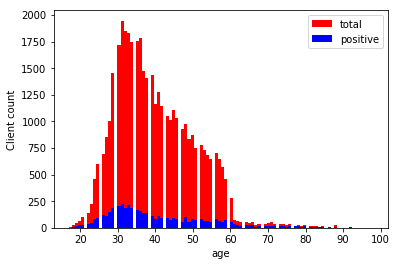

In [2]:
plt.hist(df.age, bins=100, color='r', label= 'total')
plt.hist(df.age[df.y=='yes'], bins=100, color='b', label= 'positive')
#plt.hist(np.log(df.age), bins='fd')
plt.xlabel('age')
plt.ylabel('Client count')
plt.legend()

Mostly clients with admin, blue-collar, and technician jobs are the one who subscribes to a term deposit.

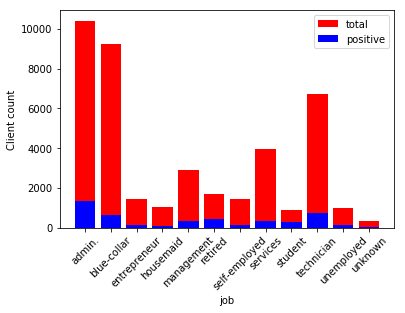

In [3]:
job_keys = np.unique(df.job)
job_dict = dict(zip(job_keys, [i for i in range(1,len(job_keys)+1)]))
df['job'] = df['job'].map(job_dict)
plt.bar(np.unique(df.job), [df.job.value_counts()[lvl] for lvl in np.unique(df.job)], color='r', label= 'total')
plt.bar(np.unique(df.job[df.y=='yes']), [df.job[df.y=='yes'].value_counts()[lvl] for lvl in np.unique(df.job[df.y=='yes'])], color='b', label= 'positive')
plt.xticks([job_dict[key] for key in job_dict], [key for key in job_dict], rotation=45)
plt.xlabel('job')
plt.ylabel('Client count')
plt.legend()

If we consider marital status, single and married clients share the larger number of subscribers (14% and 10%).

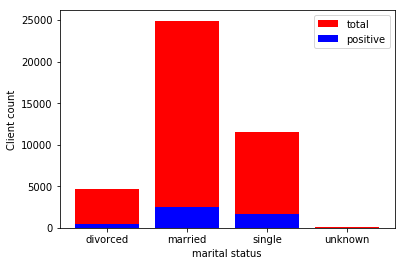

In [4]:
marital_keys = np.unique(df.marital)
marital_dict = dict(zip(marital_keys, [i for i in range(1,len(marital_keys)+1)]))
df['marital'] = df['marital'].map(marital_dict)
plt.bar(np.unique(df.marital), [df.marital.value_counts()[lvl] for lvl in np.unique(df.marital)], color='r', label= 'total')
plt.bar(np.unique(df.marital[df.y=='yes']), [df.marital[df.y=='yes'].value_counts()[lvl] for lvl in np.unique(df.marital[df.y=='yes'])], color='b', label= 'positive')
plt.xticks([marital_dict[key] for key in marital_dict], [key for key in marital_dict])
plt.xlabel('marital status')
plt.ylabel('Client count')
plt.legend()

In [42]:
df.marital.value_counts()

2    24928
3    11568
1     4612
4       80
Name: marital, dtype: int64

In [44]:
df.marital[df.y=='yes'].value_counts()

2    2532
3    1620
1     476
4      12
Name: marital, dtype: int64

A large percentage of subscribers are clients who have university degrees.

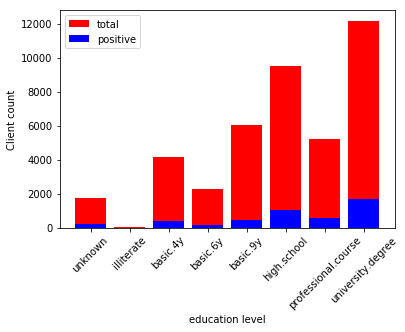

In [5]:
educ_keys = ['unknown', 'illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'professional.course', 'university.degree']
educ_dict =  dict(zip(educ_keys, [i for i in range(1,len(educ_keys)+1)]))
df['education'] = df['education'].map(educ_dict)
plt.bar(np.unique(df.education), [df.education.value_counts()[lvl] for lvl in np.unique(df.education)], color='r', label= 'total')
plt.bar(np.unique(df.education[df.y=='yes']), [df.education[df.y=='yes'].value_counts()[lvl] for lvl in np.unique(df.education[df.y=='yes'])], color='b', label= 'positive')
plt.xticks([1,2,3,4,5,6,7,8], educ_keys, rotation=45)
plt.xlabel('education level')
plt.ylabel('Client count')
plt.legend()

Usually, those who are subscribed currently doesn't have a personal loan or has credit in default. Having a housing loan or not seems seems to not matter if you are subscribing a term deposit.

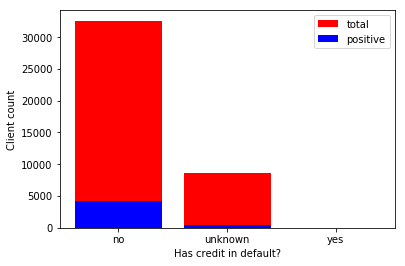

In [39]:
plt.bar(np.unique(df.default), [df.default.value_counts()[cat] for cat in np.unique(df.default)], color='r', label='total')
plt.bar(np.unique(df.default[df.y=='yes']), [df.default[df.y=='yes'].value_counts()[cat] for cat in np.unique(df.default[df.y=='yes'])], color = 'b', label='positive')
plt.xlabel('Has credit in default?')
plt.ylabel('Client count')
plt.legend()

In [6]:
df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [29]:
df['default'][df.y=='yes'].value_counts()

no         4197
unknown     443
Name: default, dtype: int64

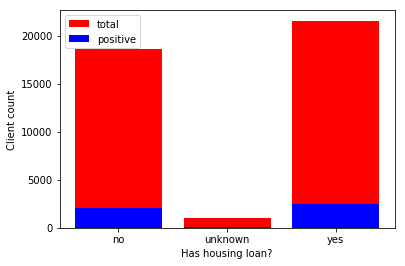

In [38]:
plt.bar(np.unique(df.housing), [df.housing.value_counts()[cat] for cat in np.unique(df.housing)], color='r', label='total')
plt.bar(np.unique(df.housing[df.y=='yes']), [df.housing[df.y=='yes'].value_counts()[cat] for cat in np.unique(df.housing[df.y=='yes'])], color = 'b', label='positive')
plt.xlabel('Has housing loan?')
plt.ylabel('Client count')
plt.legend()

In [7]:
df['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [30]:
df['housing'][df.y=='yes'].value_counts()

yes        2507
no         2026
unknown     107
Name: housing, dtype: int64

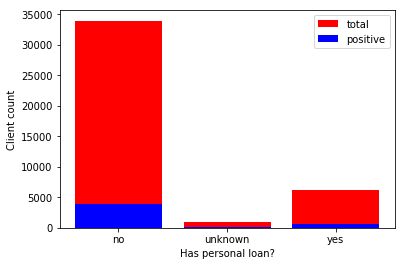

In [37]:
plt.bar(np.unique(df.loan), [df.loan.value_counts()[cat] for cat in np.unique(df.loan)], color='r', label='total')
plt.bar(np.unique(df.loan[df.y=='yes']), [df.loan[df.y=='yes'].value_counts()[cat] for cat in np.unique(df.loan[df.y=='yes'])], color = 'b', label='positive')
plt.xlabel('Has personal loan?')
plt.ylabel('Client count')
plt.legend()

In [34]:
df['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [35]:
df['loan'][df.y=='yes'].value_counts()

no         3850
yes         683
unknown     107
Name: loan, dtype: int64

## Relation of past and current campaigns on subscription

A large percentage of clients are contacted on the month of May (of current year?). It might be better if the clients are contacted evenly on other months, since the raw amount of subscribers did not change very much over the year. 

In [9]:
df['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

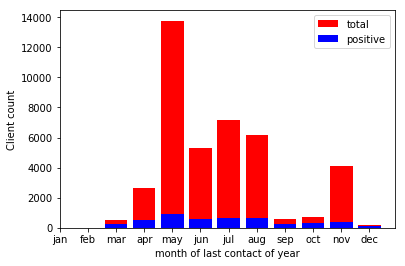

In [10]:
month_keys = ['jan', 'feb', 'mar', 'apr', 'may', 'jun','jul', 'aug', 'sep', 'oct','nov', 'dec']
month_dict = dict(zip(month_keys, [i for i in range(1,len(month_keys)+1)]))
df['month'] = df['month'].map(month_dict)
plt.bar(np.unique(df.month), [df.month.value_counts()[mon] for mon in np.unique(df.month)], color='r', label='total')
plt.bar(np.unique(df.month[df.y=='yes']), [df.month[df.y=='yes'].value_counts()[mon] for mon in np.unique(df.month[df.y=='yes'])], color = 'b', label='positive')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], month_keys)
plt.xlabel('month of last contact of year')
plt.ylabel('Client count')
plt.legend()

Clients are being called evenly on the daily scale (of current week?), and the raw number of subscibers are also uniform. 

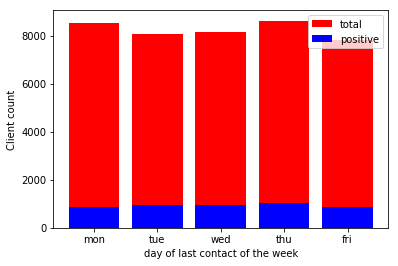

In [11]:
week_keys = ['mon','tue','wed','thu','fri']
weekday_dict = dict(zip(week_keys, [i for i in range(1,len(week_keys)+1)]))
df['day_of_week'] = df['day_of_week'].map(weekday_dict)
plt.bar(np.unique(df.day_of_week), [df.day_of_week.value_counts()[day] for day in np.unique(df.day_of_week)], color='r', label='total')
plt.bar(np.unique(df.day_of_week[df.y=='yes']), [df.day_of_week[df.y=='yes'].value_counts()[day] for day in np.unique(df.day_of_week[df.y=='yes'])], color='b', label='positive')
plt.xticks([1,2,3,4,5], week_keys)
plt.xlabel('day of last contact of the week')
plt.ylabel('Client count')
plt.legend(loc='upper right')

Since you cannot determine the duration of call beforehand, it is not a good feature to use for prediction of client subscription. Also after a call, you can already determine if the client is subscribing.

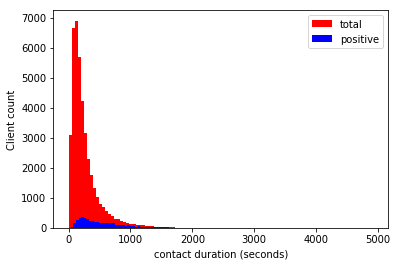

In [12]:
#df.duration.value_counts()[0] #no of clients that we are sure that y=0 since duration=0
plt.hist(df.duration, bins=100, color='r', label='total')
#plt.hist(np.log(df.duration), bins='fd')
plt.hist(df.duration[df.y=='yes'], bins=100, color='b', label='positive') 
#plt.hist(f.duration[df.duration !=0], bins='fd')
plt.xlabel('contact duration (seconds)')
plt.ylabel('Client count')
plt.legend()

For the current campaign, at least 100 clients were contacted by 1-12 calls. A large fraction of those who subscribed was only contacted once or twice.

In [21]:
df.campaign[df.y == 'yes'].value_counts()

1     2300
2     1211
3      574
4      249
5      120
6       75
7       38
9       17
8       17
10      12
11      12
17       4
13       4
12       3
15       2
14       1
23       1
Name: campaign, dtype: int64

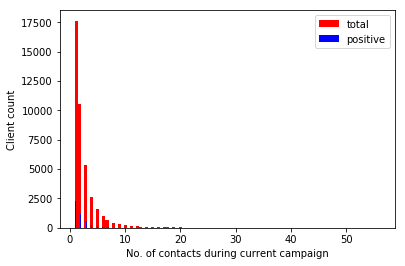

In [13]:
plt.hist(df.campaign, bins=100, color='r', label= 'total')
plt.hist(df.campaign[df.y=='yes'], bins=100, color='b', label= 'positive')
plt.xlabel('No. of contacts during current campaign')
plt.ylabel('Client count')
plt.legend()

Majority (39673) of clients are not previously called. For those previously contacted, 0-27 days passed by after last contact. Due to this extreme skewness of this feature, I decided to discard this column when used for prediction.

In [14]:
df['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

Text(0,0.5,'Client count')

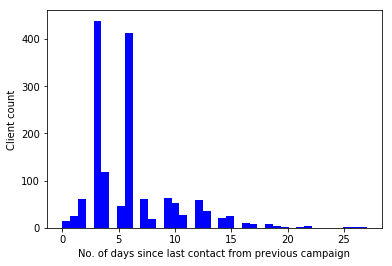

In [40]:
plt.hist(df.pdays[df.pdays != 999], bins='fd', color='b')
plt.xlabel('No. of days since last contact from previous campaign')
plt.ylabel('Client count')

The current campaign managed to contact more people, and more frequenly, compared to the previous campaign even if we ignore the large percentage of clients who did not receive a call in the previous campaign (35563).

In [16]:
df.previous.value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

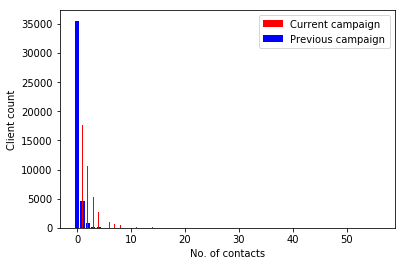

In [17]:
plt.bar(np.unique(df.previous), [df.previous.value_counts()[ct] for ct in np.unique(df.previous)], color='b', label='Previous campaign')
plt.hist(df.campaign, bins='fd', color='r', label='Current campaign')
plt.xlabel('No. of contacts')
plt.ylabel('Client count')
plt.legend()

In the previous campaign, the raw number of 'successes' in having clients subscribe to a term deposit is 1373. This increased to 4640 in the current campaign. More than half of the clients who subscribed in the previous campaign also subscribed in the current campaign (894, 65%) while some clients who are subscribed previously (479, 35%) are now unsubscirbed, thus something has to be done on client retention. Majority of the 'successes' in the current campaign came from clients with 'non-existent' previous interaction with the bank (3141), and some of the clients (605) who said 'no' previously are also subscribed now. Having 'non-existent' label for poutcome should mean no previous contact, i.e. previous = 0.

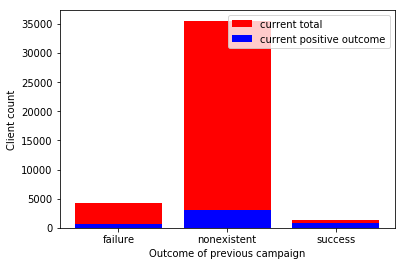

In [19]:
pout_keys = ['failure', 'nonexistent', 'success']
pout_dict = dict(zip(pout_keys, [-1,0,1]))
df['poutcome'] = df['poutcome'].map(pout_dict)
plt.bar(np.unique(df.poutcome), [df.poutcome.value_counts()[lvl] for lvl in np.unique(df.poutcome)], color='r', label= 'current total')
plt.bar(np.unique(df.poutcome[df.y=='yes']), [df.poutcome[df.y=='yes'].value_counts()[lvl] for lvl in np.unique(df.poutcome[df.y=='yes'])], color='b', label= 'current positive outcome')
plt.xticks([-1,0,1], pout_keys)
plt.xlabel('Outcome of previous campaign')
plt.ylabel('Client count')
plt.legend()

In [23]:
df.poutcome[df.y=='yes'].value_counts()

 0    3141
 1     894
-1     605
Name: poutcome, dtype: int64

In [26]:
df.y[df.poutcome ==1].value_counts()

yes    894
no     479
Name: y, dtype: int64

In [27]:
df.poutcome.value_counts()

 0    35563
-1     4252
 1     1373
Name: poutcome, dtype: int64

In [28]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64